In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [3]:
train_data= pd.read_csv('/kaggle/input/30-days-of-ml/train.csv')
test_data= pd.read_csv('/kaggle/input/30-days-of-ml/test.csv')


In [4]:
f=['cat1','cat3','cat5','cat8','cont0','cont2','cont3','cont4','cont5','cont7','cont8','cont9','cont10','cont11','cont12','cont13']
test=test_data[f]

In [5]:
train_data.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [6]:
train_data.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [8]:
train_data.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [9]:
# cat data
df_cat=train_data[[ 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9']]

# continous data
df_cont=train_data[['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13']]

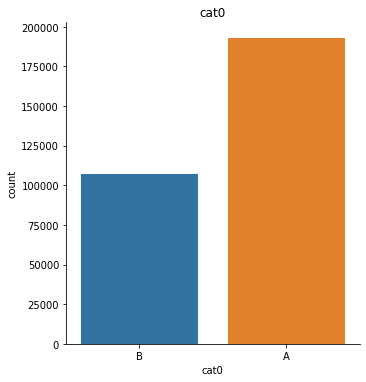

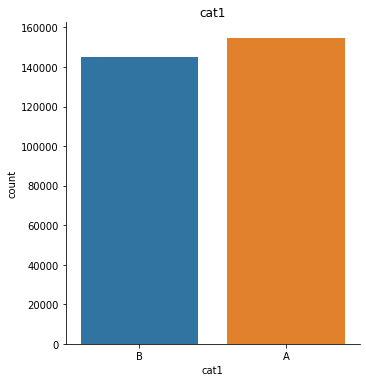

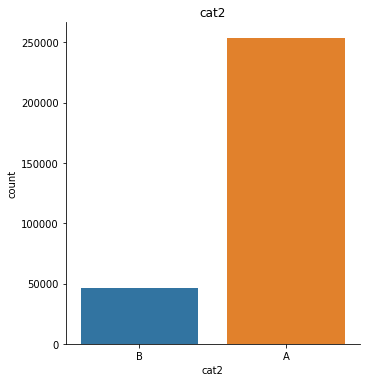

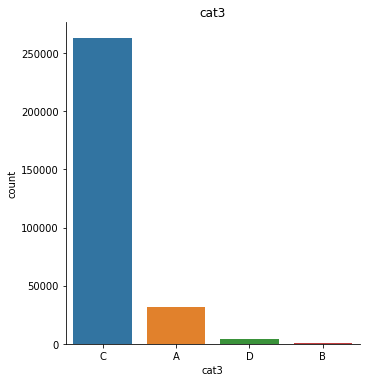

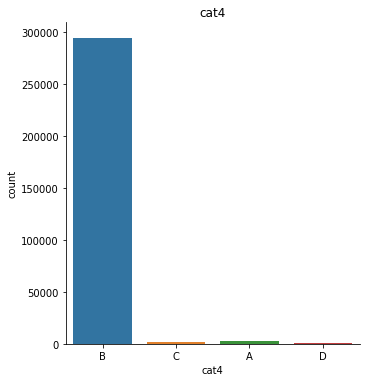

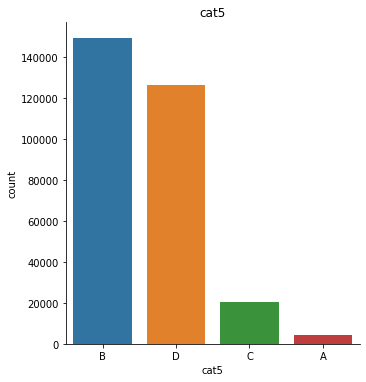

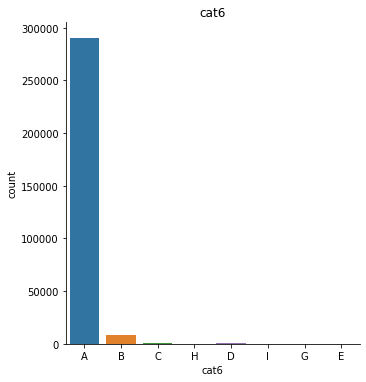

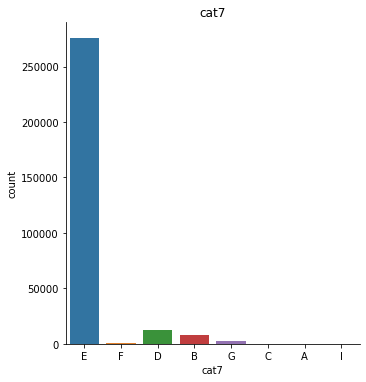

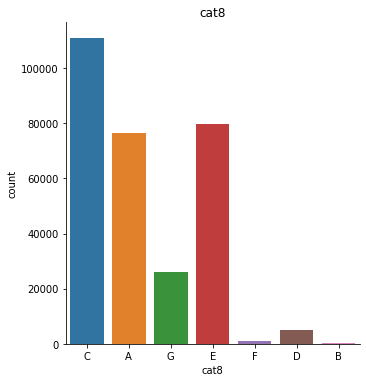

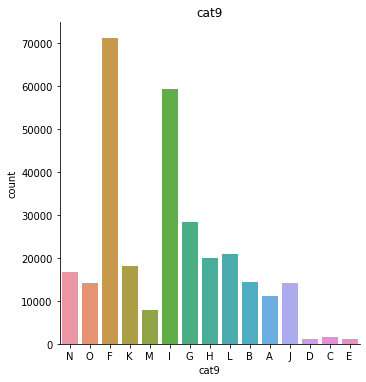

In [10]:
import seaborn as sns
for i in df_cat.columns:
    sns.catplot(x=i,data = df_cat, kind='count').set(title=i)
    plt.show()

In [11]:
" cat 4 6 7  has no effect "
" cat 2 alitle "
"0 1 3 5 8 9"

'0 1 3 5 8 9'

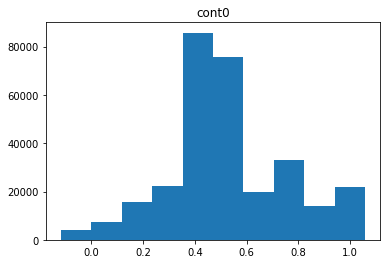

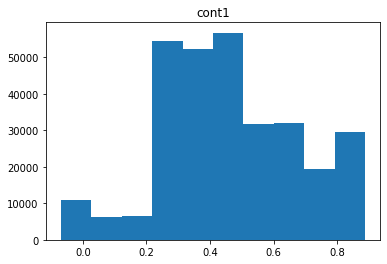

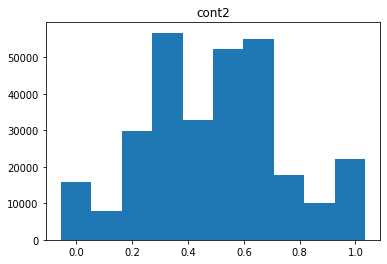

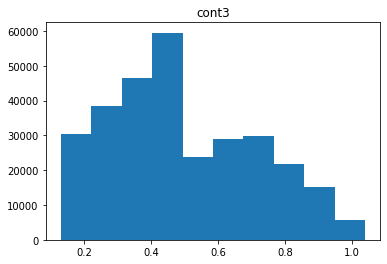

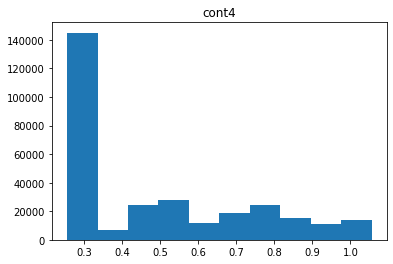

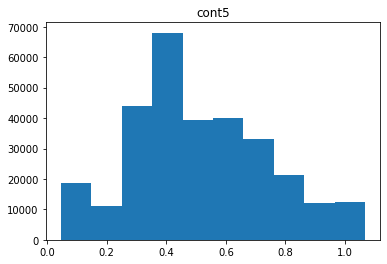

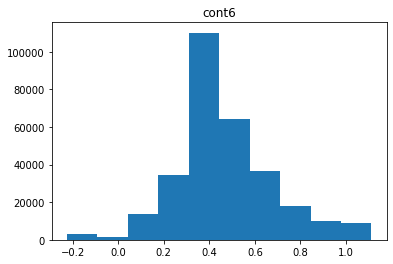

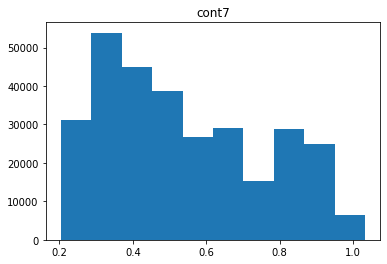

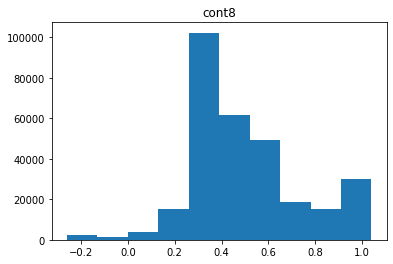

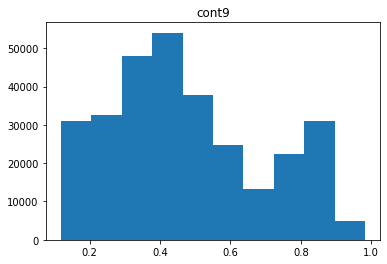

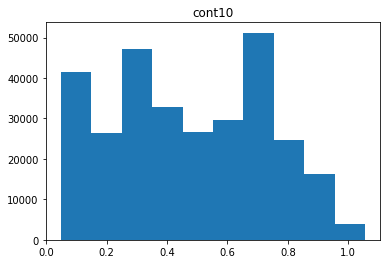

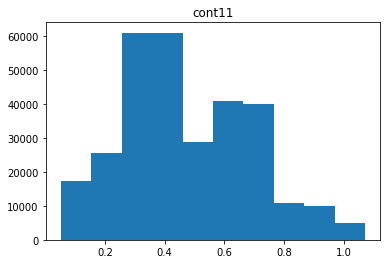

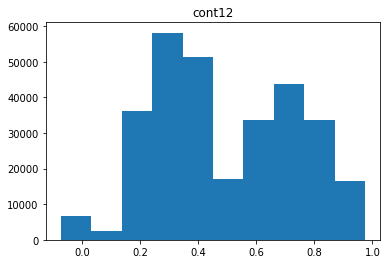

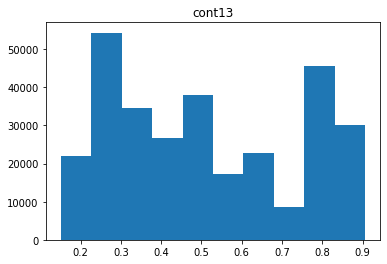

In [12]:
for i in df_cont.columns:
    plt.hist(df_cont[i])
    plt.title(i)
    plt.show()

In [31]:
"4 has no effect"
" 0 1 2 3 5 6 7 8 9 10 11 12 13"

' 0 1 2 3 5 6 7 8 9 10 11 12 13'

In [6]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
lebl = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in train_data.columns.to_numpy():
    # Compare if the dtype is object
    if train_data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        train_data[col]=lebl.fit_transform(train_data[col])

In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


f=['cat0', 'cat1',  'cat5', 'cat8', 'cat9', 'cont0', 
   'cont1', 'cont2', 'cont3',  'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13']
X_train, X_test, y_train, y_test  =train_test_split(train_data[f],train_data['target'], test_size=0.33,random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [20]:
predictions = model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.8384291068241917


In [26]:
"so big error"

'so big error'

In [ ]:
""

In [ ]:
" now cont 2,5,4 is with us"
" 6,11,13 maybe"
" 0,1,8 is out"

In [45]:
cat =[ 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9']
dic={}
for i in cat:
    X_train, X_test, y_train, y_test  =train_test_split(train_data[[i]],train_data['target'], test_size=0.33,random_state=42)   
    my_model = XGBRegressor()
    my_model.fit(X_train, y_train)
    pred1 = my_model.predict(X_test)
    dic[i]=mean_absolute_error(pred1, y_test)

dic2=dict(sorted(dic.items(),key= lambda x:x[1],reverse=True))    
dic2

{'cat5': 0.5902544915236159,
 'cat7': 0.5902343395078323,
 'cat6': 0.5902023322291192,
 'cat0': 0.5901767771020702,
 'cat2': 0.5901700642109938,
 'cat4': 0.5901231114125186,
 'cat3': 0.5900278577305147,
 'cat9': 0.5900273639784919,
 'cat1': 0.5897389011894034,
 'cat8': 0.5893448060438142}

In [ ]:
f=['cat1','cat3','cat5','cat8','cont0','cont2','cont3','cont4','cont5','cont7','cont8','cont9','cont10','cont11','cont12','cont13']

In [30]:
"0 1 5 8 9"

'0 1 5 8 9'

In [47]:
cont = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4' ,'cont5','cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12','cont13']
dic={}
for  i in cont:
    X_train, X_test, y_train, y_test  =train_test_split(train_data[[i]],train_data['target'], test_size=0.33,random_state=42)
    my_model = XGBRegressor()
    my_model.fit(X_train, y_train)
    pred = my_model.predict(X_test)
    dic[i]=mean_absolute_error(pred, y_test)
    
dic2=dict(sorted(dic.items(),key= lambda x:x[1],reverse=True))    
dic2

{'cont1': 0.5912467078998118,
 'cont8': 0.5912432073079285,
 'cont5': 0.5909132336794819,
 'cont0': 0.5908138445643264,
 'cont11': 0.5907788361434017,
 'cont3': 0.5907595416517843,
 'cont6': 0.5905582801619927,
 'cont7': 0.5904822467786237,
 'cont13': 0.5903898419339003,
 'cont4': 0.5895858354585278,
 'cont2': 0.5892343186349357,
 'cont9': 0.5881699529968398,
 'cont12': 0.5876512526197081,
 'cont10': 0.5871477679853608}

In [21]:

#f=['cat1','cat3','cat5','cat8','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13'] 57602

#f=['cat1','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont8','cont9','cont10','cont11','cont12','cont13']57554
#575706
f=['cat1','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']
#f=['cat0','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']5767273
#f=['cat0','cat1','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']575980
#f=['cat0','cat1','cat3','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']576114
#f=['cat0','cat1','cat3','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont8','cont9','cont10','cont11','cont12','cont13']5759
#f=['cat0','cat1','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']57598

X_train, X_test, y_train, y_test  =train_test_split(train_data[f],train_data['target'], test_size=0.33,random_state=42)
my_model = XGBRegressor()
my_model.fit(X_train, y_train)
pred = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(pred, y_test)))  

Mean Absolute Error: 0.5757067187118152


In [22]:

"""f=['cat1','cat3','cat5','cat7','cat8','cont0','cont2','cont3','cont4','cont5','cont7','cont8','cont9','cont10','cont11','cont12','cont13']
X_train, X_test, y_train, y_test  =train_test_split(train_data[f],train_data['target'], test_size=0.33,random_state=42)
my_model = XGBRegressor()
my_model.fit(X_train, y_train)
pred = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(pred, y_test)))  """

'f=[\'cat1\',\'cat3\',\'cat5\',\'cat7\',\'cat8\',\'cont0\',\'cont2\',\'cont3\',\'cont4\',\'cont5\',\'cont7\',\'cont8\',\'cont9\',\'cont10\',\'cont11\',\'cont12\',\'cont13\']\nX_train, X_test, y_train, y_test  =train_test_split(train_data[f],train_data[\'target\'], test_size=0.33,random_state=42)\nmy_model = XGBRegressor()\nmy_model.fit(X_train, y_train)\npred = my_model.predict(X_test)\nprint("Mean Absolute Error: " + str(mean_absolute_error(pred, y_test)))  '

In [23]:
"""from sklearn.metrics import mean_absolute_error

"with 4 -> 0.5783926404746528 "
"without-> 0.5763149384695787 "
"alldata-> 0.5762427935635132"

pred = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(pred, y_test)))"""

'from sklearn.metrics import mean_absolute_error\n\n"with 4 -> 0.5783926404746528 "\n"without-> 0.5763149384695787 "\n"alldata-> 0.5762427935635132"\n\npred = my_model.predict(X_test)\nprint("Mean Absolute Error: " + str(mean_absolute_error(pred, y_test)))'

In [24]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
lebl = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in test_data.columns.to_numpy():
    # Compare if the dtype is object
    if test_data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        test_data[col]=lebl.fit_transform(test_data[col])

In [25]:
"RMSE"
mean_absolute_error(pred, y_test)**0.5

0.7587533978255486

In [26]:
f=['cat1','cat3','cat5','cat8','cat9','cont0','cont2','cont3','cont5','cont7','cont9','cont10','cont11','cont12','cont13']

preds=my_model.predict(test_data[f])
predi = pd.DataFrame()
predi["id"] = test_data["id"]
predi["target"] = preds

predi.to_csv('submission.csv', index=False, header=predi.columns)
predi.head()

,id,target
0,0,8.058604
1,5,8.398495
2,15,8.379127
3,16,8.381173
4,17,8.107049
